<a href="https://colab.research.google.com/github/Sid-1306/Projects/blob/main/Sarcasm_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import json
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [3]:
vocab_size = 10000
embed_dim = 20
max_len = 100
training_size = 20000

In [4]:
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/sarcasm.json \
    -O /tmp/sarcasm.json


--2021-12-14 10:41:29--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/sarcasm.json
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.141.128, 2607:f8b0:4023:c0b::80
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.141.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5643545 (5.4M) [application/json]
Saving to: ‘/tmp/sarcasm.json’

/tmp/sarcasm.json   100%[===================>]   5.38M  --.-KB/s    in 0.08s   

2021-12-14 10:41:29 (68.4 MB/s) - ‘/tmp/sarcasm.json’ saved [5643545/5643545]



In [5]:
with open("/tmp/sarcasm.json", 'r') as f:
  data = json.load(f)

In [8]:
sentences = []
labels = []


In [9]:
for item in data:
  sentences.append(item['headline'])
  labels.append(item['is_sarcastic'])

In [10]:
training_sentences = sentences[0:training_size]
training_labels = labels[0:training_size]

testing_labels = labels[training_size:]
testing_sentences = sentences[training_size:]

In [11]:
tokenizer = Tokenizer(num_words=vocab_size, oov_token='<OOV>')
tokenizer.fit_on_texts(training_sentences)

word_index = tokenizer.word_index

In [12]:
training_seq = tokenizer.texts_to_sequences(training_sentences)
training_padd = pad_sequences(training_seq, maxlen=max_len, padding='post', truncating='post')

In [13]:
testing_seq = tokenizer.texts_to_sequences(testing_sentences)
testing_padd = pad_sequences(testing_seq, maxlen=max_len, padding='post', truncating='post')

In [24]:
import numpy as np

training_padd = np.array(training_padd)
training_labels = np.array(training_labels)
testing_padd = np.array(testing_padd)
testing_labels = np.array(testing_labels)

In [25]:
model = tf.keras.Sequential([
                             tf.keras.layers.Embedding(vocab_size, embed_dim, input_length=max_len),
                             tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
                             tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(12)),
                             tf.keras.layers.Dense(32, activation='relu'),
                             tf.keras.layers.Dense(1, activation='sigmoid')
])

In [26]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [27]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 100, 20)           200000    
                                                                 
 global_average_pooling1d_1   (None, 20)               0         
 (GlobalAveragePooling1D)                                        
                                                                 
 dense_2 (Dense)             (None, 32)                672       
                                                                 
 dense_3 (Dense)             (None, 1)                 33        
                                                                 
Total params: 200,705
Trainable params: 200,705
Non-trainable params: 0
_________________________________________________________________


In [28]:
history = model.fit(training_padd, training_labels, epochs=30, validation_data=(testing_padd, testing_labels), verbose=2)

Epoch 1/30
625/625 - 3s - loss: 0.6536 - accuracy: 0.6024 - val_loss: 0.5336 - val_accuracy: 0.7793 - 3s/epoch - 4ms/step
Epoch 2/30
625/625 - 2s - loss: 0.4016 - accuracy: 0.8407 - val_loss: 0.3783 - val_accuracy: 0.8378 - 2s/epoch - 3ms/step
Epoch 3/30
625/625 - 2s - loss: 0.2962 - accuracy: 0.8831 - val_loss: 0.3479 - val_accuracy: 0.8556 - 2s/epoch - 3ms/step
Epoch 4/30
625/625 - 2s - loss: 0.2453 - accuracy: 0.9027 - val_loss: 0.3657 - val_accuracy: 0.8371 - 2s/epoch - 3ms/step
Epoch 5/30
625/625 - 2s - loss: 0.2122 - accuracy: 0.9199 - val_loss: 0.3462 - val_accuracy: 0.8550 - 2s/epoch - 3ms/step
Epoch 6/30
625/625 - 2s - loss: 0.1848 - accuracy: 0.9306 - val_loss: 0.3568 - val_accuracy: 0.8538 - 2s/epoch - 3ms/step
Epoch 7/30
625/625 - 2s - loss: 0.1659 - accuracy: 0.9366 - val_loss: 0.3836 - val_accuracy: 0.8483 - 2s/epoch - 3ms/step
Epoch 8/30
625/625 - 2s - loss: 0.1464 - accuracy: 0.9475 - val_loss: 0.3906 - val_accuracy: 0.8511 - 2s/epoch - 3ms/step
Epoch 9/30
625/625 - 2s 

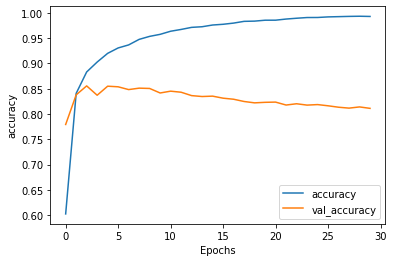

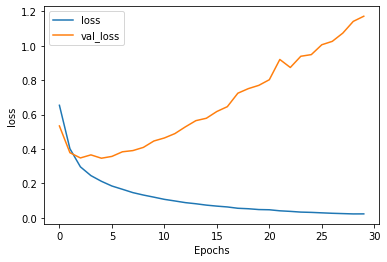

In [30]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()
  
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

In [31]:
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

def decode_sentence(text):
    return ' '.join([reverse_word_index.get(i, '?') for i in text])

print(decode_sentence(training_padd[0]))
print(training_sentences[2])
print(labels[2])

former <OOV> store clerk sues over secret 'black <OOV> for minority shoppers ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ?
mom starting to fear son's web series closest thing she will have to grandchild
1


In [32]:
e = model.layers[0]
weights = e.get_weights()[0]
print(weights.shape) # shape: (vocab_size, embedding_dim)


(10000, 20)


In [33]:
import io

out_v = io.open('vecs.tsv', 'w', encoding='utf-8')
out_m = io.open('meta.tsv', 'w', encoding='utf-8')
for word_num in range(1, vocab_size):
  word = reverse_word_index[word_num]
  embeddings = weights[word_num]
  out_m.write(word + "\n")
  out_v.write('\t'.join([str(x) for x in embeddings]) + "\n")
out_v.close()
out_m.close()

In [34]:
sentence = ["granny starting to fear spiders in the garden might be real", "game of thrones season finale showing this sunday night"]
sequences = tokenizer.texts_to_sequences(sentence)
padded = pad_sequences(sequences, maxlen=max_len, padding='post', truncating='post')
print(model.predict(padded))

[[8.687398e-01]
 [6.885153e-07]]
